## Gathering the data
We begin this project by importing the requests, os, pandas, numpy  packages as below.

In [80]:
#Importing required packages
import requests
import os
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

We now create a folder called 'Dogs' where we will store some of our project files. We then download the 'image-predictions.tsv' file from this URL, https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'.

In [2]:
#Create a folder called dogs
fname = 'Dogs'
if not os.path.exists(fname):
    os.makedirs(fname)

In [3]:
#Identify the URL to download from
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [4]:
#Write the tsv value in the designated folder
with open(os.path.join(fname, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

Next is that we proceed and download additinonal information from the twitter API as follows: Please note that the secret keys and token passwords have been ommited

<li> Import the  required libraries

In [5]:
#Import required libraries
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

<li>Connect to the twitter API

In [6]:
#Connect to the twitter API
consumer_key = 'Hidden'
consumer_secret = 'Hidden'
access_token = 'Hidden'
access_secret = 'Hidden'
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

<li>Download the data via the twitter API and save the data in a JSON file named ''tweet_json.txt''

In [194]:
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Rate limit reached. Sleeping for: 25


Success
902: 758474966123810816
Success
903: 758467244762497024
Success
904: 758405701903519748
Success
905: 758355060040593408
Success
906: 758099635764359168
Success
907: 758041019896193024
Success
908: 757741869644341248
Success
909: 757729163776290825
Success
910: 757725642876129280
Success
911: 757611664640446465
Success
912: 757597904299253760
Success
913: 757596066325864448
Success
914: 757400162377592832
Success
915: 757393109802180609
Success
916: 757354760399941633
Success
917: 756998049151549440
Success
918: 756939218950160384
Success
919: 756651752796094464
Success
920: 756526248105566208
Success
921: 756303284449767430
Success
922: 756288534030475264
Success
923: 756275833623502848
Success
924: 755955933503782912
Success
925: 755206590534418437
Success
926: 755110668769038337
Success
927: 754874841593970688
Success
928: 754856583969079297
Success
929: 754747087846248448
Success
930: 754482103782404096
Success
931: 754449512966619136
Success
932: 754120377874386944
Success


Rate limit reached. Sleeping for: 49


Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
1812: 676819651066732545
Success
1813: 676811746707918848
Success
1814: 676776431406465024
Success
1815: 676617503762681856
Success
1816: 676613908052996102
Success
1817: 676606785097199616
Success
1818: 676603393314578432
Success
1819: 676593408224403456
Success
1820: 676590572941893632
Success
1821: 676588346097852417
Success
1822: 676582956622721024
Success
1823: 676575501977128964
Success
1824: 676533798876651520
Success
1825: 676496375194980353
Success
1826: 676470639084101634
Success
1827: 676440007570247681
Success
1828: 676430933382295552
Success
1829: 676263575653122048
Success
1830: 676237365392908289
Success
1831: 676219687039057920
Success
18

In the code below we open the 'tweet_json.txt' file and generate a list of dictionaries.

In [7]:
#Open the json text file and generate a list of dictionaries and read the first few values
with open('tweet_json.txt') as file:
    status = []
    for line in file:
        status.append(json.loads(line))
status # List of Dictionaries

[{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
  'id': 892420643555336193,
  'id_str': '892420643555336193',
  'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
  'truncated': False,
  'display_text_range': [0, 85],
  'entities': {'hashtags': [],
   'symbols': [],
   'user_mentions': [],
   'urls': [],
   'media': [{'id': 892420639486877696,
     'id_str': '892420639486877696',
     'indices': [86, 109],
     'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
     'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
     'url': 'https://t.co/MgUWQ76dJU',
     'display_url': 'pic.twitter.com/MgUWQ76dJU',
     'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
     'type': 'photo',
     'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'},
      'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
      'small': {'w': 540, 'h': 528, 'resize': 'fit'},

What follows is that we covert the list of dictionaries into a pandas data frame.

In [9]:
#Convert the list of dictionaries to a data frame and read the first few lines
tweet_json=pd.DataFrame(status)
tweet_json.head()

created_at                  id              id_str  \
0  Tue Aug 01 16:23:56 +0000 2017  892420643555336193  892420643555336193   
1  Tue Aug 01 00:17:27 +0000 2017  892177421306343426  892177421306343426   
2  Mon Jul 31 00:18:03 +0000 2017  891815181378084864  891815181378084864   
3  Sun Jul 30 15:58:51 +0000 2017  891689557279858688  891689557279858688   
4  Sat Jul 29 16:00:24 +0000 2017  891327558926688256  891327558926688256   

                                           full_text  truncated  \
0  This is Phineas. He's a mystical boy. Only eve...      False   
1  This is Tilly. She's just checking pup on you....      False   
2  This is Archie. He is a rare Norwegian Pouncin...      False   
3  This is Darla. She commenced a snooze mid meal...      False   
4  This is Franklin. He would like you to stop ca...      False   

  display_text_range                                           entities  \
0            [0, 85]  {'hashtags': [], 'symbols': [], 'user_mentions...   
1           [0, 138]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2           [0, 121]  {'hashtags': [], 'symbols': [], 'user_mentions...   
3            [0, 79]  {'hashtags': [], 'symbols': [], 'user_mentions...   
4           [0, 138]  {'hashtags': [{'text': 'BarkWeek', 'indices': ...   

                                   extended_entities  \
0  {'media': [{'id': 892420639486877696, 'id_str'...   
1  {'media': [{'id': 892177413194625024, 'id_str'...   
2  {'media': [{'id': 891815175371796480, 'id_str'...   
3  {'media': [{'id': 891689552724799489, 'id_str'...   
4  {'media': [{'id': 891327551943041024, 'id_str'...   

                                              source  in_reply_to_status_id  \
0  <a href="http://twitter.com/download/iphone" r...                    NaN   
1  <a href="http://twitter.com/download/iphone" r...                    NaN   
2  <a href="http://twitter.com/download/iphone" r...                    NaN   
3  <a href="http://twitter.com/download/iphone" r...                    NaN   
4  <a href="http://twitter.com/download/iphone" r...                    NaN   

   ... favorite_count  favorited retweeted possibly_sensitive  \
0  ...          39467      False     False              False   
1  ...          33819      False     False              False   
2  ...          25461      False     False              False   
3  ...          42908      False     False              False   
4  ...          41048      False     False              False   

  possibly_sensitive_appealable lang retweeted_status quoted_status_id  \
0                         False   en              NaN              NaN   
1                         False   en              NaN              NaN   
2                         False   en              NaN              NaN   
3                         False   en              NaN              NaN   
4                         False   en              NaN              NaN   

  quoted_status_id_str  quoted_status  
0                  NaN            NaN  
1                  NaN            NaN  
2                  NaN            NaN  
3                  NaN            NaN  
4                  NaN            NaN  

[5 rows x 31 columns]

In [10]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2354 non-null   object 
 1   id                             2354 non-null   int64  
 2   id_str                         2354 non-null   object 
 3   full_text                      2354 non-null   object 
 4   truncated                      2354 non-null   bool   
 5   display_text_range             2354 non-null   object 
 6   entities                       2354 non-null   object 
 7   extended_entities              2073 non-null   object 
 8   source                         2354 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     o

We now query the required additional columns, i.e 'id','favorite_count','retweet_count', from the entire data frame and save it in a csv file named 'additional_tweet_data.csv'.

In [11]:
#Query the required additional columns from the entire data frame
tweet_json=tweet_json[['id','retweeted','favorited','favorite_count','retweet_count',]]
tweet_json=tweet_json.rename(columns={'id':'tweet_id','favorite_count':'FavoriteCount','retweet_count':'RetweetCount'})
#Print a few lines to check
tweet_json.head()

tweet_id  retweeted  favorited  FavoriteCount  RetweetCount
0  892420643555336193      False      False          39467          8853
1  892177421306343426      False      False          33819          6514
2  891815181378084864      False      False          25461          4328
3  891689557279858688      False      False          42908          8964
4  891327558926688256      False      False          41048          9774

In [12]:
tweet_json=tweet_json.to_csv('additional_tweet_data.csv',index=False)


So far we have our three files: <br />
 **'twitter-archive-enhanced.csv'** which was directly downloaded <br />
 **'image-predictions.tsv'** which was dowloaded programatically from a URL <br />
 **'tweet_json.txt'** which was dowloaded programatically via the twitter API.This file has been then converted into a pandas data frame and saved as a csv file named **'additional_tweet_data.csv'**

We have now fully gathered the required data therefore we proceed and **Assess** the gathered data.

# Assessing the data

In this stage we assess each of the three files and note any data cleaning actions required. We begin by loading the three datasets as below.

In [13]:
twitter_archive=pd.read_csv('Dogs/twitter-archive-enhanced.csv')
image_predictions=pd.read_csv('Dogs/image-predictions.tsv',sep='\t')
tweet_json=pd.read_csv('additional_tweet_data.csv')

We begin by doing a visual inspection and then programmatic inspection.

In [14]:
twitter_archive

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
...                  ...                    ...                  ...   
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
0     2017-08-01 16:23:56 +0000   
1     2017-08-01 00:17:27 +0000   
2     2017-07-31 00:18:03 +0000   
3     2017-07-30 15:58:51 +0000   
4     2017-07-29 16:00:24 +0000   
...                         ...   
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
0     This is Phineas. He's a mystical boy. Only eve...                  NaN   
1     This is Tilly. She's just checking pup on you....                  NaN   
2     This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3     This is Darla. She commenced a snooze mid meal...                  NaN   
4     This is Franklin. He would like you to stop ca...                  NaN   
...                                                 ...                  ...   
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
0                          NaN                        NaN   
1                          NaN                        NaN   
2                          NaN                        NaN   
3                          NaN                        NaN   
4                          NaN                        NaN   
...                        ...                        ...   
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...                13   
1     https://twitter.com/dog_rates/status/892177421...                13   
2     https://twitter.com/dog_rates/status/891815181...                12   
3     https://twitt

In [15]:
image_predictions


tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                      p1   p1_conf  p1_dog                  p2  \
0           1  Welsh_springer_spaniel  0.465074    True              collie   
1           1                 redbone  0.506826    True  miniature_pinscher   
2           1         German_shepherd  0.596461    True            malinois   
3           1     Rhodesian_ridgeback  0.408143    True             redbone   
4           1      miniature_pinscher  0.560311    True          Rottweiler   
...       ...                     ...       ...     ...                 ...   
2070        2                  basset  0.555712    True    English_springer   
2071        1             paper_towel  0.170278   False  Labrador_retriever   
2072        1               Chihuahua  0.716012    True            malamute   
2073        1               Chihuahua  0.323581    True            Pekinese   
2074        1                  orange  0.097049   False               bagel   

       p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0     0.156665    True            Shetland_sheepdog  0.061428    True  
1     0.074192    True          Rhodesian_ridgeback  0.072010    True  
2     0.138584    True                   bloodhound  0.116197    True  
3     0.360687    True           miniature_pinscher  0.222752    True  
4     0.243682    True                     Doberman  0.154629    True  
...        ...     ...                          ...       ...     ...  
2070  0.225770    True  German_short-haired_pointer  0.175219    True  
2071  0.168086    True                      spatula  0.040836   False  
2072  0.078253    True                       kelpie  0.031379    True  
2073  0.090647    True                     papillon  0.068957    True  
2074  0.085851   False                       banana  0.076110   False  

[2075 rows x 12 columns]

In [16]:
tweet_json

tweet_id  retweeted  favorited  FavoriteCount  RetweetCount
0     892420643555336193      False      False          39467          8853
1     892177421306343426      False      False          33819          6514
2     891815181378084864      False      False          25461          4328
3     891689557279858688      False      False          42908          8964
4     891327558926688256      False      False          41048          9774
...                  ...        ...        ...            ...           ...
2349  666049248165822465      False      False            111            41
2350  666044226329800704      False      False            311           147
2351  666033412701032449      False      False            128            47
2352  666029285002620928      False      False            132            48
2353  666020888022790149      False      False           2535           532

[2354 rows x 5 columns]

In [17]:
twitter_archive.tail()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
2351  https://twitter.com/dog_rates/status/666049248...                 5   
2352  https://twitter.com/dog_rates/status/666044226...                 6   
2353  https://twitter.com/dog_rates/status/666033412...                 9   
2354  https://twitter.com/dog_rates/status/666029285...                 7   
2355  https://twitter.com/dog_rates/status/666020888...                 8   

      rating_denominator  name doggo floofer pupper puppo  
2351                  10  None  None    None   None  None  
2352                  10     a  None    None   None  None  
2353                  10     a  None    None   None  None  
2354                  10     a  None    None   None  None  
2355                  10  None  None    None   None  None

In [18]:
image_predictions.tail()

tweet_id                                          jpg_url  \
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num           p1   p1_conf  p1_dog                  p2   p2_conf  \
2070        2       basset  0.555712    True    English_springer  0.225770   
2071        1  paper_towel  0.170278   False  Labrador_retriever  0.168086   
2072        1    Chihuahua  0.716012    True            malamute  0.078253   
2073        1    Chihuahua  0.323581    True            Pekinese  0.090647   
2074        1       orange  0.097049   False               bagel  0.085851   

      p2_dog                           p3   p3_conf  p3_dog  
2070    True  German_short-haired_pointer  0.175219    True  
2071    True                      spatula  0.040836   False  
2072    True                       kelpie  0.031379    True  
2073    True                     papillon  0.068957    True  
2074   False                       banana  0.076110   False

In [19]:
tweet_json.tail()

tweet_id  retweeted  favorited  FavoriteCount  RetweetCount
2349  666049248165822465      False      False            111            41
2350  666044226329800704      False      False            311           147
2351  666033412701032449      False      False            128            47
2352  666029285002620928      False      False            132            48
2353  666020888022790149      False      False           2535           532

In [20]:
twitter_archive.sample(20)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
749   779124354206535695                    NaN                  NaN   
165   860177593139703809                    NaN                  NaN   
2195  668872652652679168                    NaN                  NaN   
1659  683098815881154561                    NaN                  NaN   
2149  669684865554620416           6.693544e+17         4.196984e+09   
1830  676219687039057920                    NaN                  NaN   
860   763167063695355904                    NaN                  NaN   
974   750056684286914561                    NaN                  NaN   
1369  702332542343577600                    NaN                  NaN   
1610  685532292383666176                    NaN                  NaN   
670   789986466051088384                    NaN                  NaN   
1963  673352124999274496                    NaN                  NaN   
557   803380650405482500                    NaN                  NaN   
1116  732585889486888962                    NaN                  NaN   
2131  670086499208155136                    NaN                  NaN   
1446  696490539101908992           6.964887e+17         4.196984e+09   
2190  668960084974809088                    NaN                  NaN   
1750  679001094530465792                    NaN                  NaN   
101   872668790621863937                    NaN                  NaN   
1450  695816827381944320                    NaN                  NaN   

                      timestamp  \
749   2016-09-23 01:04:56 +0000   
165   2017-05-04 17:01:34 +0000   
2195  2015-11-23 19:24:02 +0000   
1659  2016-01-02 01:33:43 +0000   
2149  2015-11-26 01:11:28 +0000   
1830  2015-12-14 01:58:31 +0000   
860   2016-08-10 00:16:21 +0000   
974   2016-07-04 20:00:23 +0000   
1369  2016-02-24 03:21:41 +0000   
1610  2016-01-08 18:43:29 +0000   
670   2016-10-23 00:27:05 +0000   
1963  2015-12-06 04:03:51 +0000   
557   2016-11-28 23:30:47 +0000   
1116  2016-05-17 14:57:41 +0000   
2131  2015-11-27 03:47:25 +0000   
1446  2016-02-08 00:27:39 +0000   
2190  2015-11-24 01:11:27 +0000   
1750  2015-12-21 18:10:50 +0000   
101   2017-06-08 04:17:07 +0000   
1450  2016-02-06 03:50:33 +0000   

                                                 source  \
749   <a href="http://twitter.com/download/iphone" r...   
165   <a href="http://twitter.com/download/iphone" r...   
2195  <a href="http://twitter.com/download/iphone" r...   
1659  <a href="http://twitter.com/download/iphone" r...   
2149  <a href="http://twitter.com/download/iphone" r...   
1830  <a href="http://twitter.com/download/iphone" r...   
860   <a href="http://twitter.com/download/iphone" r...   
974   <a href="https://about.twitter.com/products/tw...   
1369  <a href="http://vine.co" rel="nofollow">Vine -...   
1610  <a href="http://twitter.com/download/iphone" r...   
670   <a href="http://twitter.com/download/iphone" r...   
1963  <a href="http://twitter.com/download/iphone" r...   
557   <a href="http://twitter.com/download/iphone" r...   
1116  <a href="http://twitter.com/download/iphone" r...   
2131  <a href="http://twitter.com/download/iphone" r...   
1446  <a href="http://twitter.com/download/iphone" r...   
2190  <a href="http://twitter.com/download/iphone" r...   
1750  <a href="http://vine.co" rel="nofollow">Vine -...   
101   <a href="http://twitter.com/download/iphone" r...   
1450  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
749   RT @dog_rates: Meet Hurley. He's the curly one...         6.794628e+17   
165   RT @dog_rates: Ohboyohboyohboyohboyohboyohboyo...         7.616730e+17   
2195  This is Amélie. She is a confident white colle...                  NaN   
1659  aahhhhkslaldhwnxmzbbs 12/10 for being da smoos...                  NaN   
2149  After countless hours of research and hundreds...                  NaN   
1830  This is Kenneth. He's stuck in a bubble. 

In [21]:
image_predictions.sample(20)

tweet_id                                            jpg_url  \
1736  821813639212650496    https://pbs.twimg.com/media/CtVAvX-WIAAcGTf.jpg   
1708  817827839487737858  https://pbs.twimg.com/ext_tw_video_thumb/81782...   
1259  748699167502000129    https://pbs.twimg.com/media/CmPp5pOXgAAD_SG.jpg   
530   676819651066732545    https://pbs.twimg.com/media/CWSL4W8WsAAE4KU.jpg   
33    666430724426358785    https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg   
1314  754856583969079297    https://pbs.twimg.com/media/CnnKCKNWgAAcOB8.jpg   
1293  751598357617971201    https://pbs.twimg.com/media/Cm42t5vXEAAv4CS.jpg   
1896  850145622816686080    https://pbs.twimg.com/media/C8xS655XkAAv9vo.jpg   
381   673317986296586240    https://pbs.twimg.com/media/CVgbIobUYAEaeI3.jpg   
150   668641109086707712    https://pbs.twimg.com/media/CUd9ivxWUAAuXSQ.jpg   
1623  803638050916102144  https://pbs.twimg.com/ext_tw_video_thumb/80363...   
1629  805207613751304193    https://pbs.twimg.com/media/CyysDQlVIAAYgrl.jpg   
2074  892420643555336193    https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   
652   682032003584274432    https://pbs.twimg.com/media/CXcQfUNUQAEwFoQ.jpg   
313   671561002136281088    https://pbs.twimg.com/media/CVHdK-7WwAAsuyc.jpg   
1627  804413760345620481    https://pbs.twimg.com/media/CuRDF-XWcAIZSer.jpg   
816   692828166163931137    https://pbs.twimg.com/media/CZ1riVOWwAATfGf.jpg   
1000  708711088997666817    https://pbs.twimg.com/media/CdXY-GHWoAALing.jpg   
1743  822859134160621569    https://pbs.twimg.com/media/C2tiAzGXgAIFdqi.jpg   
275   670838202509447168    https://pbs.twimg.com/media/CU9LyIMWIAA6OOu.jpg   

      img_num                  p1   p1_conf  p1_dog  \
1736        1       Saint_Bernard  0.995143    True   
1708        1      cocker_spaniel  0.387608    True   
1259        1            Pembroke  0.849029    True   
530         2         rain_barrel  0.625555   False   
33          1               llama  0.505184   False   
1314        2    golden_retriever  0.872385    True   
1293        1          toy_poodle  0.757756    True   
1896        2         tennis_ball  0.714798   False   
381         2  miniature_pinscher  0.384099    True   
150         1              vacuum  0.432594   False   
1623        1  Labrador_retriever  0.372776    True   
1629        1            Pembroke  0.244705    True   
2074        1              orange  0.097049   False   
652         1          schipperke  0.997953    True   
313         1       Gordon_setter  0.469373    True   
1627        1                chow  0.090341    True   
816         1             Samoyed  0.985857    True   
1000        2         tennis_ball  0.912961   False   
1743        1            malinois  0.332897    True   
275         1            flamingo  0.992710   False   

                               p2   p2_conf  p2_dog  \
1736                     Cardigan  0.003044    True   
1708             golden_retriever  0.264844    True   
1259                     Cardigan  0.083629    True   
530                        barrel  0.138383   False   
33                  Irish_terrier  0.104109    True   
1314           Labrador_retriever  0.099963    True   
1293             miniature_poodle  0.035150    True   
1896                       kelpie  0.105390    True   
381                    bloodhound  0.079923    True   
150                           pug  0.146311    True   
1623             golden_retriever  0.343666    True   
1629          Rhodesian_ridgeback  0.180461    True   
2074                        bagel  0.085851   False   
652                   groenendael  0.000676    True   
313       black-and-tan_coonhound  0.270893    True   
1627                   binoculars  0.083499   False   
816                    Arctic_fox  0.007852   False   
1000  German_short-haired_pointer  0.052695    True   
1743                    Chihuahua  0.104116    True   
275                  coral_fungus  0.003491   False   

                             p3   p3_conf  p

In [22]:
tweet_json.sample(20)

tweet_id  retweeted  favorited  FavoriteCount  RetweetCount
736   780858289093574656      False      False           8033          2328
1552  688898160958271489      False      False           2307           890
1260  710140971284037632      False      False           3017          1008
2069  671115716440031232      False      False           1436           842
673   789599242079838210      False      False           7620          2279
731   781524693396357120      False      False          23163          6426
643   793180763617361921      False      False           7740          2310
1201  716285507865542656      False      False           3041          1225
1031  745074613265149952      False      False           8605          3976
313   835172783151792128      False      False          28552          6516
780   775729183532220416      False      False          14361          5302
1782  677662372920729601      False      False           2134          1101
1510  691321916024623104      False      False           2828           747
833   768193404517830656      False      False          12157          4080
2031  671744970634719232      False      False           1430           841
1743  679148763231985668      False      False           3028          1163
600   798665375516884993      False      False              0          4519
1500  692041934689402880      False      False           3724          1424
40    884441805382717440      False      False          27478          5856
482   814986499976527872      False      False           8485          1505

In [23]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [24]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [25]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   tweet_id       2354 non-null   int64
 1   retweeted      2354 non-null   bool 
 2   favorited      2354 non-null   bool 
 3   FavoriteCount  2354 non-null   int64
 4   RetweetCount   2354 non-null   int64
dtypes: bool(2), int64(3)
memory usage: 59.9 KB


In [26]:
twitter_archive['tweet_id'].duplicated().sum()

0

In [27]:
image_predictions['tweet_id'].duplicated().sum()

0

In [28]:
tweet_json['tweet_id'].duplicated().sum()

0

In [29]:
twitter_archive.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

In [30]:
image_predictions.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

In [31]:
tweet_json.describe()

tweet_id  FavoriteCount  RetweetCount
count  2.354000e+03    2354.000000   2354.000000
mean   7.426978e+17    8080.968564   3164.797366
std    6.852812e+16   11814.771334   5284.770364
min    6.660209e+17       0.000000      0.000000
25%    6.783975e+17    1415.000000    624.500000
50%    7.194596e+17    3603.500000   1473.500000
75%    7.993058e+17   10122.250000   3652.000000
max    8.924206e+17  132810.000000  79515.000000

## Data Assessment Observations

## 1. twitter_archive Dataset
####  Data quality issues
<li>Invalid values for 'source' e.g "a href="http://twitter.com/download/iphone" r."
<li> Missing values for `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`,	`retweeted_status_user_id`,	`retweeted_status_timestamp`,	
<li> Missing values for expanded_urls
<li> None, jo, o, my, JD, dppear to be real  'names for dogs
<li> Invalid values for 'expanded_urls' e.g https://www.gofundme.com/bennys-medical-bills,...	
<li>'rating_denominator' cannot be zero since dividing by a non-zero value by zero results to a mathematical error
<li> None, jo, o, my, JD, and josep do not appear to be real  'names for dogs.<li/>

####  Data tidiness issues
<li> 'doggo' ,	'floofer' ,	'pupper' and'puppo' are values and not variable names, They are values for dog stages
<li> The 'in_reply_to_status_id' , 'in_reply_to_user_id', `retweeted_status_id`,	and `retweeted_status_user_id`   data type is float but should be string,
<li> The 'timestamp' data type is string and not datetime

## 2.  image_predictions dataset
####  Data quality issues
<li>Column names for the dataframe are not appropriate column names except for the ` tweet_id `
<li>Some p1, p2 and p3 values starting with small letter
<li> Missing records 2075 records found but expected 2356 records
<li> Names are seperated using _ instead of a space.<li/>

####  Data tidiness issues
  <li>  tweet_id is integer but should be a string

## 3. tweet_json dataset
####  Data quality issues
<li>Missing records.<li/>
    
####  Data tidines  issues
<li> 'tweet_id' is integer but should be a string
<li>  This dataset should be merged with the 'twitter_archive' dataset

# Cleaning the data
We have now assessed our three datasets and documented the data cleaning needs. What follows now is the actual data cleaning using the Define, Code and Test Approach. We do data cleaning independently for each dataset. The first thing we are going to do is to make a copy of the data sets as below.

In [32]:
#We begin by making copies of each data dataset
twitter_archive_copy=twitter_archive.copy()
image_predictions_copy=image_predictions.copy()
tweet_json_copy=tweet_json.copy()


In [33]:
tweet_json_copy

tweet_id  retweeted  favorited  FavoriteCount  RetweetCount
0     892420643555336193      False      False          39467          8853
1     892177421306343426      False      False          33819          6514
2     891815181378084864      False      False          25461          4328
3     891689557279858688      False      False          42908          8964
4     891327558926688256      False      False          41048          9774
...                  ...        ...        ...            ...           ...
2349  666049248165822465      False      False            111            41
2350  666044226329800704      False      False            311           147
2351  666033412701032449      False      False            128            47
2352  666029285002620928      False      False            132            48
2353  666020888022790149      False      False           2535           532

[2354 rows x 5 columns]

## A.  twitter_archive Dataset

In [34]:
twitter_archive_copy.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

#### Define
•  Format 'source' field to take the standard URL format, e.g from 'a href="http://twitter.com/download/iphone" r.' to http://twitter.com/download/iphone

#### Code

In [35]:
twitter_archive_copy['source']=twitter_archive_copy['source'].str[8:] #Scrip off the 'a href' part
twitter_archive_copy['source'] = twitter_archive_copy['source'].str.split('rel=').str[0] #Remove the 'rel part'
twitter_archive_copy['source'] = twitter_archive_copy['source'].str.replace('"', '') #Remove the '"'

#### Test


In [75]:
twitter_archive_copy

tweet_id in_reply_to_status_id in_reply_to_user_id  \
0     892420643555336193                   nan                 nan   
1     892177421306343426                   nan                 nan   
2     891815181378084864                   nan                 nan   
3     891689557279858688                   nan                 nan   
4     891327558926688256                   nan                 nan   
...                  ...                   ...                 ...   
9419  666049248165822465                   nan                 nan   
9420  666044226329800704                   nan                 nan   
9421  666033412701032449                   nan                 nan   
9422  666029285002620928                   nan                 nan   
9423  666020888022790149                   nan                 nan   

                      timestamp                               source  \
0     2017-08-01 16:23:56 +0000  http://twitter.com/download/iphone    
1     2017-08-01 00:17:27 +0000  http://twitter.com/download/iphone    
2     2017-07-31 00:18:03 +0000  http://twitter.com/download/iphone    
3     2017-07-30 15:58:51 +0000  http://twitter.com/download/iphone    
4     2017-07-29 16:00:24 +0000  http://twitter.com/download/iphone    
...                         ...                                  ...   
9419  2015-11-16 00:24:50 +0000  http://twitter.com/download/iphone    
9420  2015-11-16 00:04:52 +0000  http://twitter.com/download/iphone    
9421  2015-11-15 23:21:54 +0000  http://twitter.com/download/iphone    
9422  2015-11-15 23:05:30 +0000  http://twitter.com/download/iphone    
9423  2015-11-15 22:32:08 +0000  http://twitter.com/download/iphone    

                                                   text retweeted_status_id  \
0     This is Phineas. He's a mystical boy. Only eve...                 nan   
1     This is Tilly. She's just checking pup on you....                 nan   
2     This is Archie. He is a rare Norwegian Pouncin...                 nan   
3     This is Darla. She commenced a snooze mid meal...                 nan   
4     This is Franklin. He would like you to stop ca...                 nan   
...                                                 ...                 ...   
9419  Here we have a 1949 1st generation vulpix. Enj...                 nan   
9420  This is a purebred Piers Morgan. Loves to Netf...                 nan   
9421  Here is a very happy pup. Big fan of well-main...                 nan   
9422  This is a western brown Mitsubishi terrier. Up...                 nan   
9423  Here we have a Japanese Irish Setter. Lost eye...                 nan   

     retweeted_status_user_id retweeted_status_timestamp  \
0                         nan                        NaN   
1                         nan                        NaN   
2                         nan                        NaN   
3                         nan                        NaN   
4                         nan                        NaN   
...                       ...                        ...   
9419                      nan                        NaN   
9420                      nan                        NaN   
9421                      nan                        NaN   
9422                      nan                        NaN   
9423                      nan                        NaN   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...                13   
1     https://twitter.com/dog_rates/status/892177421...                13   
2     https://twitter.com/dog_rates/status/891815181...                12   
3     https://twitter.com/dog_rates/status/891689557...                13   
4     https://twitter.com/dog_rates/status/891327558...                12   
...                                                 ...               ...   
9419  https://twitter.com/dog_rates/status/666049248...                 5   
9420  https://twitter.co

#### Define 
<li> Fill in the missing 'expanded_urls' by concatenating with the 'source' with the 'tweet_id' values.
<li> Update the invalid 'expanded_urls' e.g https://www.gofundme.com/bennys-medical-bills,...

#### Code

In [36]:
twitter_archive_copy['expanded_urls']='https://twitter.com/dog_rates/status/'+twitter_archive_copy['tweet_id'].astype(str)


#### Test

In [37]:
twitter_archive_copy['expanded_urls'].isnull().sum()

0

In [38]:
twitter_archive_copy

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
...                  ...                    ...                  ...   
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp                               source  \
0     2017-08-01 16:23:56 +0000  http://twitter.com/download/iphone    
1     2017-08-01 00:17:27 +0000  http://twitter.com/download/iphone    
2     2017-07-31 00:18:03 +0000  http://twitter.com/download/iphone    
3     2017-07-30 15:58:51 +0000  http://twitter.com/download/iphone    
4     2017-07-29 16:00:24 +0000  http://twitter.com/download/iphone    
...                         ...                                  ...   
2351  2015-11-16 00:24:50 +0000  http://twitter.com/download/iphone    
2352  2015-11-16 00:04:52 +0000  http://twitter.com/download/iphone    
2353  2015-11-15 23:21:54 +0000  http://twitter.com/download/iphone    
2354  2015-11-15 23:05:30 +0000  http://twitter.com/download/iphone    
2355  2015-11-15 22:32:08 +0000  http://twitter.com/download/iphone    

                                                   text  retweeted_status_id  \
0     This is Phineas. He's a mystical boy. Only eve...                  NaN   
1     This is Tilly. She's just checking pup on you....                  NaN   
2     This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3     This is Darla. She commenced a snooze mid meal...                  NaN   
4     This is Franklin. He would like you to stop ca...                  NaN   
...                                                 ...                  ...   
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
0                          NaN                        NaN   
1                          NaN                        NaN   
2                          NaN                        NaN   
3                          NaN                        NaN   
4                          NaN                        NaN   
...                        ...                        ...   
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...                13   
1     https://twitter.com/dog_rates/status/892177421...                13   
2     https://twitter.com/dog_rates/status/891815181...                12   
3     https://twitter.com/dog_rates/status/891689557...                13   
4     https://twitter.com/dog_rates/status/891327558...                12   
...                                                 ...               ...   
2351  https://twitter.com/dog_rates/status/666049248.

#### Define
<li> Replace zero values for 'rating_denominator' with the mean

#### Code

In [39]:
twitter_archive_copy[twitter_archive_copy['rating_denominator']==0]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
313  835246439529840640           8.352460e+17           26259576.0   

                     timestamp                               source  \
313  2017-02-24 21:54:03 +0000  http://twitter.com/download/iphone    

                                                  text  retweeted_status_id  \
313  @jonnysun @Lin_Manuel ok jomny I know you're e...                  NaN   

     retweeted_status_user_id retweeted_status_timestamp  \
313                       NaN                        NaN   

                                         expanded_urls  rating_numerator  \
313  https://twitter.com/dog_rates/status/835246439...               960   

     rating_denominator  name doggo floofer pupper puppo  
313                   0  None  None    None   None  None

In [40]:
#Replace the rating denomonator at index 313  with mean
my_mean=twitter_archive_copy['rating_denominator'].mean()
my_mean1=int(my_mean)
twitter_archive_copy['rating_denominator'] = twitter_archive_copy['rating_denominator'].replace(0,my_mean1)

#### Test

In [41]:
#REtrieve the record by index location. 
twitter_archive_copy.loc[[313]]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
313  835246439529840640           8.352460e+17           26259576.0   

                     timestamp                               source  \
313  2017-02-24 21:54:03 +0000  http://twitter.com/download/iphone    

                                                  text  retweeted_status_id  \
313  @jonnysun @Lin_Manuel ok jomny I know you're e...                  NaN   

     retweeted_status_user_id retweeted_status_timestamp  \
313                       NaN                        NaN   

                                         expanded_urls  rating_numerator  \
313  https://twitter.com/dog_rates/status/835246439...               960   

     rating_denominator  name doggo floofer pupper puppo  
313                  10  None  None    None   None  None

#### Define
Convert the  'in_reply_to_status_id' , 'in_reply_to_user_id', `retweeted_status_id`, and `retweeted_status_user_id` data types from  float to string.

#### Code

In [42]:
#convert the The 'in_reply_to_status_id' , 'in_reply_to_user_id', `retweeted_status_id`, and `retweeted_status_user_id` data type to int
twitter_archive_copy['in_reply_to_status_id']=twitter_archive_copy['in_reply_to_status_id' ].astype(str)
twitter_archive_copy['in_reply_to_user_id']=twitter_archive_copy['in_reply_to_user_id' ].astype(str)
twitter_archive_copy['retweeted_status_id']=twitter_archive_copy['retweeted_status_id' ].astype(str)
twitter_archive_copy['retweeted_status_user_id']=twitter_archive_copy['retweeted_status_user_id' ].astype(str)
twitter_archive_copy['tweet_id']=twitter_archive_copy['tweet_id'].astype(str)

#### Test 

In [43]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   tweet_id                    2356 non-null   object
 1   in_reply_to_status_id       2356 non-null   object
 2   in_reply_to_user_id         2356 non-null   object
 3   timestamp                   2356 non-null   object
 4   source                      2356 non-null   object
 5   text                        2356 non-null   object
 6   retweeted_status_id         2356 non-null   object
 7   retweeted_status_user_id    2356 non-null   object
 8   retweeted_status_timestamp  181 non-null    object
 9   expanded_urls               2356 non-null   object
 10  rating_numerator            2356 non-null   int64 
 11  rating_denominator          2356 non-null   int64 
 12  name                        2356 non-null   object
 13  doggo                       2356 non-null   obje

#### Define
Melt the vriables  'doggo' , 'floofer' , 'pupper' and'puppo' to one variable called 'dog_stage'.

#### Code

In [44]:
twitter_archive_copy=pd.melt(twitter_archive_copy,id_vars=['tweet_id','in_reply_to_status_id','in_reply_to_user_id','timestamp','source','text','retweeted_status_id',
                            'retweeted_status_user_id','retweeted_status_timestamp','expanded_urls','rating_numerator','rating_denominator','name'],var_name='dog_stage',value_name='dog' )
#Drop the last column
#twitter_archive_copy=twitter_archive_copy.drop('dog', axis=1)



#### Test

In [45]:
twitter_archive_copy

tweet_id in_reply_to_status_id in_reply_to_user_id  \
0     892420643555336193                   nan                 nan   
1     892177421306343426                   nan                 nan   
2     891815181378084864                   nan                 nan   
3     891689557279858688                   nan                 nan   
4     891327558926688256                   nan                 nan   
...                  ...                   ...                 ...   
9419  666049248165822465                   nan                 nan   
9420  666044226329800704                   nan                 nan   
9421  666033412701032449                   nan                 nan   
9422  666029285002620928                   nan                 nan   
9423  666020888022790149                   nan                 nan   

                      timestamp                               source  \
0     2017-08-01 16:23:56 +0000  http://twitter.com/download/iphone    
1     2017-08-01 00:17:27 +0000  http://twitter.com/download/iphone    
2     2017-07-31 00:18:03 +0000  http://twitter.com/download/iphone    
3     2017-07-30 15:58:51 +0000  http://twitter.com/download/iphone    
4     2017-07-29 16:00:24 +0000  http://twitter.com/download/iphone    
...                         ...                                  ...   
9419  2015-11-16 00:24:50 +0000  http://twitter.com/download/iphone    
9420  2015-11-16 00:04:52 +0000  http://twitter.com/download/iphone    
9421  2015-11-15 23:21:54 +0000  http://twitter.com/download/iphone    
9422  2015-11-15 23:05:30 +0000  http://twitter.com/download/iphone    
9423  2015-11-15 22:32:08 +0000  http://twitter.com/download/iphone    

                                                   text retweeted_status_id  \
0     This is Phineas. He's a mystical boy. Only eve...                 nan   
1     This is Tilly. She's just checking pup on you....                 nan   
2     This is Archie. He is a rare Norwegian Pouncin...                 nan   
3     This is Darla. She commenced a snooze mid meal...                 nan   
4     This is Franklin. He would like you to stop ca...                 nan   
...                                                 ...                 ...   
9419  Here we have a 1949 1st generation vulpix. Enj...                 nan   
9420  This is a purebred Piers Morgan. Loves to Netf...                 nan   
9421  Here is a very happy pup. Big fan of well-main...                 nan   
9422  This is a western brown Mitsubishi terrier. Up...                 nan   
9423  Here we have a Japanese Irish Setter. Lost eye...                 nan   

     retweeted_status_user_id retweeted_status_timestamp  \
0                         nan                        NaN   
1                         nan                        NaN   
2                         nan                        NaN   
3                         nan                        NaN   
4                         nan                        NaN   
...                       ...                        ...   
9419                      nan                        NaN   
9420                      nan                        NaN   
9421                      nan                        NaN   
9422                      nan                        NaN   
9423                      nan                        NaN   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...                13   
1     https://twitter.com/dog_rates/status/892177421...                13   
2     https://twitter.com/dog_rates/status/891815181...                12   
3     https://twitter.com/dog_rates/status/891689557...                13   
4     https://twitter.com/dog_rates/status/891327558...                12   
...                                                 ...               ...   
9419  https://twitter.com/dog_rates/status/666049248...                 5   
9420  https://twitter.co

In [46]:
twitter_archive_copy_complete = twitter_archive_copy[twitter_archive_copy.dog != "None"]


In [47]:
twitter_archive_copy_complete

tweet_id in_reply_to_status_id in_reply_to_user_id  \
9     890240255349198849                   nan                 nan   
43    884162670584377345                   nan                 nan   
99    872967104147763200                   nan                 nan   
108   871515927908634625                   nan                 nan   
110   871102520638267392                   nan                 nan   
...                  ...                   ...                 ...   
8015  752519690950500352                   nan                 nan   
8029  751132876104687617                   nan                 nan   
8103  744995568523612160                   nan                 nan   
8116  743253157753532416                   nan                 nan   
8151  738537504001953792                   nan                 nan   

                      timestamp                               source  \
9     2017-07-26 15:59:51 +0000  http://twitter.com/download/iphone    
43    2017-07-09 21:29:42 +0000  http://twitter.com/download/iphone    
99    2017-06-09 00:02:31 +0000  http://twitter.com/download/iphone    
108   2017-06-04 23:56:03 +0000  http://twitter.com/download/iphone    
110   2017-06-03 20:33:19 +0000  http://twitter.com/download/iphone    
...                         ...                                  ...   
8015  2016-07-11 15:07:30 +0000  http://twitter.com/download/iphone    
8029  2016-07-07 19:16:47 +0000  http://twitter.com/download/iphone    
8103  2016-06-20 20:49:19 +0000  http://twitter.com/download/iphone    
8116  2016-06-16 01:25:36 +0000  http://twitter.com/download/iphone    
8151  2016-06-03 01:07:16 +0000  http://twitter.com/download/iphone    

                                                   text retweeted_status_id  \
9     This is Cassie. She is a college pup. Studying...                 nan   
43    Meet Yogi. He doesn't have any important dog m...                 nan   
99    Here's a very large dog. He has a date later. ...                 nan   
108   This is Napolean. He's a Raggedy East Nicaragu...                 nan   
110   Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH                 nan   
...                                                 ...                 ...   
8015  Hopefully this puppo on a swing will help get ...                 nan   
8029  This is Cooper. He's just so damn happy. 10/10...                 nan   
8103  This is Abby. She got her face stuck in a glas...                 nan   
8116  This is Kilo. He cannot reach the snackum. Nif...                 nan   
8151  This is Bayley. She fell asleep trying to esca...                 nan   

     retweeted_status_user_id retweeted_status_timestamp  \
9                         nan                        NaN   
43                        nan                        NaN   
99                        nan                        NaN   
108                       nan                        NaN   
110                       nan                        NaN   
...                       ...                        ...   
8015                      nan                        NaN   
8029                      nan                        NaN   
8103                      nan                        NaN   
8116                      nan                        NaN   
8151                      nan                        NaN   

                                          expanded_urls  rating_numerator  \
9     https://twitter.com/dog_rates/status/890240255...                14   
43    https://twitter.com/dog_rates/status/884162670...                12   
99    https://twitter.com/dog_rates/status/872967104...                12   
108   https://twitter.com/dog_rates/status/871515927...                12   
110   https://twitter.com/dog_rates/status/871102520...                14   
...                                                 ...               ...   
8015  https://twitter.com/dog_rates/status/752519690...                11   
8029  https://twitter.co

In [48]:
twitter_archive_copy_complete.duplicated().sum()

0

#### Test 

#### Define
Convert the timestamp datatype from string to date time

#### Code 

In [49]:

#Convert the timestamp column from string to date time
from datetime import datetime
twitter_archive_copy['timestamp'] = pd.to_datetime(twitter_archive_copy['timestamp'])


#### Test 

In [50]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9424 entries, 0 to 9423
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    9424 non-null   object             
 1   in_reply_to_status_id       9424 non-null   object             
 2   in_reply_to_user_id         9424 non-null   object             
 3   timestamp                   9424 non-null   datetime64[ns, UTC]
 4   source                      9424 non-null   object             
 5   text                        9424 non-null   object             
 6   retweeted_status_id         9424 non-null   object             
 7   retweeted_status_user_id    9424 non-null   object             
 8   retweeted_status_timestamp  724 non-null    object             
 9   expanded_urls               9424 non-null   object             
 10  rating_numerator            9424 non-null   int64           

In [51]:
image_predictions_copy['tweet_id']=image_predictions_copy['tweet_id'].astype(str)

In [52]:
image_predictions_copy['tweet_id']=image_predictions_copy['tweet_id'].astype(str)

In [53]:
image_predictions_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


## B. image_predictions dataset

#### Define
Give the dataset appropriate column names 

#### Code

In [54]:
image_predictions_copy.rename(columns={'jpg_url':'img_source','p1':'Prediction_1','p1_conf':'conf_int_alg_1','p1_dog':'Prediction_Status_1',
                                       'p2':'Prediction_2','p2_conf':'conf_int_alg_2','p2_dog':'Prediction_Status__2',
                                       'p3':'Prediction_3','p3_conf':'conf_int_alg_3','p3_dog':'Prediction_Status__3'},
                              inplace=True)

#### Test

In [55]:
image_predictions_copy

tweet_id                                       img_source  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num            Prediction_1  conf_int_alg_1  Prediction_Status_1  \
0           1  Welsh_springer_spaniel        0.465074                 True   
1           1                 redbone        0.506826                 True   
2           1         German_shepherd        0.596461                 True   
3           1     Rhodesian_ridgeback        0.408143                 True   
4           1      miniature_pinscher        0.560311                 True   
...       ...                     ...             ...                  ...   
2070        2                  basset        0.555712                 True   
2071        1             paper_towel        0.170278                False   
2072        1               Chihuahua        0.716012                 True   
2073        1               Chihuahua        0.323581                 True   
2074        1                  orange        0.097049                False   

            Prediction_2  conf_int_alg_2  Prediction_Status__2  \
0                 collie        0.156665                  True   
1     miniature_pinscher        0.074192                  True   
2               malinois        0.138584                  True   
3                redbone        0.360687                  True   
4             Rottweiler        0.243682                  True   
...                  ...             ...                   ...   
2070    English_springer        0.225770                  True   
2071  Labrador_retriever        0.168086                  True   
2072            malamute        0.078253                  True   
2073            Pekinese        0.090647                  True   
2074               bagel        0.085851                 False   

                     Prediction_3  conf_int_alg_3  Prediction_Status__3  
0               Shetland_sheepdog        0.061428                  True  
1             Rhodesian_ridgeback        0.072010                  True  
2                      bloodhound        0.116197                  True  
3              miniature_pinscher        0.222752                  True  
4                        Doberman        0.154629                  True  
...                           ...             ...                   ...  
2070  German_short-haired_pointer        0.175219                  True  
2071                      spatula        0.040836                 False  
2072                       kelpie        0.031379                  True  
2073                     papillon        0.068957                  True  
2074                       banana        0.076110                 False  

[2075 rows x 12 columns]

#### Define
Format the p1,p2 and p3 values to Start with a capital letter

#### Code

In [56]:
image_predictions_copy['Prediction_1']=image_predictions_copy['Prediction_1'].str.title()
image_predictions_copy['Prediction_2']=image_predictions_copy['Prediction_2'].str.title()
image_predictions_copy['Prediction_3']=image_predictions_copy['Prediction_3'].str.title()

#### Test 

In [57]:
image_predictions_copy

tweet_id                                       img_source  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num            Prediction_1  conf_int_alg_1  Prediction_Status_1  \
0           1  Welsh_Springer_Spaniel        0.465074                 True   
1           1                 Redbone        0.506826                 True   
2           1         German_Shepherd        0.596461                 True   
3           1     Rhodesian_Ridgeback        0.408143                 True   
4           1      Miniature_Pinscher        0.560311                 True   
...       ...                     ...             ...                  ...   
2070        2                  Basset        0.555712                 True   
2071        1             Paper_Towel        0.170278                False   
2072        1               Chihuahua        0.716012                 True   
2073        1               Chihuahua        0.323581                 True   
2074        1                  Orange        0.097049                False   

            Prediction_2  conf_int_alg_2  Prediction_Status__2  \
0                 Collie        0.156665                  True   
1     Miniature_Pinscher        0.074192                  True   
2               Malinois        0.138584                  True   
3                Redbone        0.360687                  True   
4             Rottweiler        0.243682                  True   
...                  ...             ...                   ...   
2070    English_Springer        0.225770                  True   
2071  Labrador_Retriever        0.168086                  True   
2072            Malamute        0.078253                  True   
2073            Pekinese        0.090647                  True   
2074               Bagel        0.085851                 False   

                     Prediction_3  conf_int_alg_3  Prediction_Status__3  
0               Shetland_Sheepdog        0.061428                  True  
1             Rhodesian_Ridgeback        0.072010                  True  
2                      Bloodhound        0.116197                  True  
3              Miniature_Pinscher        0.222752                  True  
4                        Doberman        0.154629                  True  
...                           ...             ...                   ...  
2070  German_Short-Haired_Pointer        0.175219                  True  
2071                      Spatula        0.040836                 False  
2072                       Kelpie        0.031379                  True  
2073                     Papillon        0.068957                  True  
2074                       Banana        0.076110                 False  

[2075 rows x 12 columns]

#### Define

 Remove the  '_'  betweeen first and second names in the  Prediction_1, Prediction_2 and Prediction_3 values

####  Code

In [58]:
#•  Names are seperated using _ instead of a space.
image_predictions_copy.Prediction_1 = image_predictions_copy.Prediction_1.str.replace('_', ' ')
image_predictions_copy.Prediction_2 = image_predictions_copy.Prediction_2.str.replace('_', ' ')
image_predictions_copy.Prediction_3 = image_predictions_copy.Prediction_3.str.replace('_', ' ')

#### Test 

In [59]:
image_predictions_copy

tweet_id                                       img_source  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num            Prediction_1  conf_int_alg_1  Prediction_Status_1  \
0           1  Welsh Springer Spaniel        0.465074                 True   
1           1                 Redbone        0.506826                 True   
2           1         German Shepherd        0.596461                 True   
3           1     Rhodesian Ridgeback        0.408143                 True   
4           1      Miniature Pinscher        0.560311                 True   
...       ...                     ...             ...                  ...   
2070        2                  Basset        0.555712                 True   
2071        1             Paper Towel        0.170278                False   
2072        1               Chihuahua        0.716012                 True   
2073        1               Chihuahua        0.323581                 True   
2074        1                  Orange        0.097049                False   

            Prediction_2  conf_int_alg_2  Prediction_Status__2  \
0                 Collie        0.156665                  True   
1     Miniature Pinscher        0.074192                  True   
2               Malinois        0.138584                  True   
3                Redbone        0.360687                  True   
4             Rottweiler        0.243682                  True   
...                  ...             ...                   ...   
2070    English Springer        0.225770                  True   
2071  Labrador Retriever        0.168086                  True   
2072            Malamute        0.078253                  True   
2073            Pekinese        0.090647                  True   
2074               Bagel        0.085851                 False   

                     Prediction_3  conf_int_alg_3  Prediction_Status__3  
0               Shetland Sheepdog        0.061428                  True  
1             Rhodesian Ridgeback        0.072010                  True  
2                      Bloodhound        0.116197                  True  
3              Miniature Pinscher        0.222752                  True  
4                        Doberman        0.154629                  True  
...                           ...             ...                   ...  
2070  German Short-Haired Pointer        0.175219                  True  
2071                      Spatula        0.040836                 False  
2072                       Kelpie        0.031379                  True  
2073                     Papillon        0.068957                  True  
2074                       Banana        0.076110                 False  

[2075 rows x 12 columns]

## C. tweet_json dataset

#### Define
Convert the tweet_id from integer to string

#### Code

In [60]:
tweet_json_copy['tweet_id']=tweet_json_copy['tweet_id'].astype(str)

#### Test

In [61]:
tweet_json_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tweet_id       2354 non-null   object
 1   retweeted      2354 non-null   bool  
 2   favorited      2354 non-null   bool  
 3   FavoriteCount  2354 non-null   int64 
 4   RetweetCount   2354 non-null   int64 
dtypes: bool(2), int64(2), object(1)
memory usage: 59.9+ KB


In [62]:
twitter_archive_merged=pd.merge(twitter_archive_copy_complete, tweet_json_copy, how='left',
                            on='tweet_id')


In [63]:
twitter_archive_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 393
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    394 non-null    object 
 1   in_reply_to_status_id       394 non-null    object 
 2   in_reply_to_user_id         394 non-null    object 
 3   timestamp                   394 non-null    object 
 4   source                      394 non-null    object 
 5   text                        394 non-null    object 
 6   retweeted_status_id         394 non-null    object 
 7   retweeted_status_user_id    394 non-null    object 
 8   retweeted_status_timestamp  38 non-null     object 
 9   expanded_urls               394 non-null    object 
 10  rating_numerator            394 non-null    int64  
 11  rating_denominator          394 non-null    int64  
 12  name                        394 non-null    object 
 13  dog_stage                   394 non

#### Test

In [64]:
twitter_archive_merged

tweet_id in_reply_to_status_id in_reply_to_user_id  \
0    890240255349198849                   nan                 nan   
1    884162670584377345                   nan                 nan   
2    872967104147763200                   nan                 nan   
3    871515927908634625                   nan                 nan   
4    871102520638267392                   nan                 nan   
..                  ...                   ...                 ...   
389  752519690950500352                   nan                 nan   
390  751132876104687617                   nan                 nan   
391  744995568523612160                   nan                 nan   
392  743253157753532416                   nan                 nan   
393  738537504001953792                   nan                 nan   

                     timestamp                               source  \
0    2017-07-26 15:59:51 +0000  http://twitter.com/download/iphone    
1    2017-07-09 21:29:42 +0000  http://twitter.com/download/iphone    
2    2017-06-09 00:02:31 +0000  http://twitter.com/download/iphone    
3    2017-06-04 23:56:03 +0000  http://twitter.com/download/iphone    
4    2017-06-03 20:33:19 +0000  http://twitter.com/download/iphone    
..                         ...                                  ...   
389  2016-07-11 15:07:30 +0000  http://twitter.com/download/iphone    
390  2016-07-07 19:16:47 +0000  http://twitter.com/download/iphone    
391  2016-06-20 20:49:19 +0000  http://twitter.com/download/iphone    
392  2016-06-16 01:25:36 +0000  http://twitter.com/download/iphone    
393  2016-06-03 01:07:16 +0000  http://twitter.com/download/iphone    

                                                  text retweeted_status_id  \
0    This is Cassie. She is a college pup. Studying...                 nan   
1    Meet Yogi. He doesn't have any important dog m...                 nan   
2    Here's a very large dog. He has a date later. ...                 nan   
3    This is Napolean. He's a Raggedy East Nicaragu...                 nan   
4    Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH                 nan   
..                                                 ...                 ...   
389  Hopefully this puppo on a swing will help get ...                 nan   
390  This is Cooper. He's just so damn happy. 10/10...                 nan   
391  This is Abby. She got her face stuck in a glas...                 nan   
392  This is Kilo. He cannot reach the snackum. Nif...                 nan   
393  This is Bayley. She fell asleep trying to esca...                 nan   

    retweeted_status_user_id retweeted_status_timestamp  \
0                        nan                        NaN   
1                        nan                        NaN   
2                        nan                        NaN   
3                        nan                        NaN   
4                        nan                        NaN   
..                       ...                        ...   
389                      nan                        NaN   
390                      nan                        NaN   
391                      nan                        NaN   
392                      nan                        NaN   
393                      nan                        NaN   

                                         expanded_urls  rating_numerator  \
0    https://twitter.com/dog_rates/status/890240255...                14   
1    https://twitter.com/dog_rates/status/884162670...                12   
2    https://twitter.com/dog_rates/status/872967104...                12   
3    https://twitter.com/dog_rates/status/871515927...                12   
4    https://twitter.com/dog_rates/status/871102520...                14   
..                                                 ...               ...   
389  https://twitter.com/dog_rates/status/752519690...                11   
390  https://twitter.com/dog_rates/status/751132876...                10   
391

### Define
Merge all the datasets

#### Code

In [65]:
twitter_master=pd.merge(twitter_archive_merged, image_predictions_copy, how='left',
                            on='tweet_id')


#### Test

In [66]:
twitter_master

tweet_id in_reply_to_status_id in_reply_to_user_id  \
0    890240255349198849                   nan                 nan   
1    884162670584377345                   nan                 nan   
2    872967104147763200                   nan                 nan   
3    871515927908634625                   nan                 nan   
4    871102520638267392                   nan                 nan   
..                  ...                   ...                 ...   
389  752519690950500352                   nan                 nan   
390  751132876104687617                   nan                 nan   
391  744995568523612160                   nan                 nan   
392  743253157753532416                   nan                 nan   
393  738537504001953792                   nan                 nan   

                     timestamp                               source  \
0    2017-07-26 15:59:51 +0000  http://twitter.com/download/iphone    
1    2017-07-09 21:29:42 +0000  http://twitter.com/download/iphone    
2    2017-06-09 00:02:31 +0000  http://twitter.com/download/iphone    
3    2017-06-04 23:56:03 +0000  http://twitter.com/download/iphone    
4    2017-06-03 20:33:19 +0000  http://twitter.com/download/iphone    
..                         ...                                  ...   
389  2016-07-11 15:07:30 +0000  http://twitter.com/download/iphone    
390  2016-07-07 19:16:47 +0000  http://twitter.com/download/iphone    
391  2016-06-20 20:49:19 +0000  http://twitter.com/download/iphone    
392  2016-06-16 01:25:36 +0000  http://twitter.com/download/iphone    
393  2016-06-03 01:07:16 +0000  http://twitter.com/download/iphone    

                                                  text retweeted_status_id  \
0    This is Cassie. She is a college pup. Studying...                 nan   
1    Meet Yogi. He doesn't have any important dog m...                 nan   
2    Here's a very large dog. He has a date later. ...                 nan   
3    This is Napolean. He's a Raggedy East Nicaragu...                 nan   
4    Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH                 nan   
..                                                 ...                 ...   
389  Hopefully this puppo on a swing will help get ...                 nan   
390  This is Cooper. He's just so damn happy. 10/10...                 nan   
391  This is Abby. She got her face stuck in a glas...                 nan   
392  This is Kilo. He cannot reach the snackum. Nif...                 nan   
393  This is Bayley. She fell asleep trying to esca...                 nan   

    retweeted_status_user_id retweeted_status_timestamp  \
0                        nan                        NaN   
1                        nan                        NaN   
2                        nan                        NaN   
3                        nan                        NaN   
4                        nan                        NaN   
..                       ...                        ...   
389                      nan                        NaN   
390                      nan                        NaN   
391                      nan                        NaN   
392                      nan                        NaN   
393                      nan                        NaN   

                                         expanded_urls  ...  img_num  \
0    https://twitter.com/dog_rates/status/890240255...  ...      1.0   
1    https://twitter.com/dog_rates/status/884162670...  ...      1.0   
2    https://twitter.com/dog_rates/status/872967104...  ...      2.0   
3    https://twitter.com/dog_rates/status/871515927...  ...      2.0   
4    https://twitter.com/dog_rates/status/871102520...  ...      NaN   
..                                                 ...  ...      ...   
389  https://twitter.com/dog_rates/status/752519690...  ...      3.0   
390  https://twitter.com/dog_rates/status/751132876...  ...      1.0   
391  https://twitter.com/dog_rates/stat

#### Saving the Master File
We now save the cleaned dataset to a csv file named ' twitter_archive_master.csv'

#### Code

In [67]:
twitter_master.to_csv(' twitter_archive_master.csv', index=False)

#### Test

In [68]:
twitter_master_clean=pd.read_csv(' twitter_archive_master.csv')
twitter_master_clean

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0    890240255349198849                    NaN                  NaN   
1    884162670584377345                    NaN                  NaN   
2    872967104147763200                    NaN                  NaN   
3    871515927908634625                    NaN                  NaN   
4    871102520638267392                    NaN                  NaN   
..                  ...                    ...                  ...   
389  752519690950500352                    NaN                  NaN   
390  751132876104687617                    NaN                  NaN   
391  744995568523612160                    NaN                  NaN   
392  743253157753532416                    NaN                  NaN   
393  738537504001953792                    NaN                  NaN   

                     timestamp                               source  \
0    2017-07-26 15:59:51 +0000  http://twitter.com/download/iphone    
1    2017-07-09 21:29:42 +0000  http://twitter.com/download/iphone    
2    2017-06-09 00:02:31 +0000  http://twitter.com/download/iphone    
3    2017-06-04 23:56:03 +0000  http://twitter.com/download/iphone    
4    2017-06-03 20:33:19 +0000  http://twitter.com/download/iphone    
..                         ...                                  ...   
389  2016-07-11 15:07:30 +0000  http://twitter.com/download/iphone    
390  2016-07-07 19:16:47 +0000  http://twitter.com/download/iphone    
391  2016-06-20 20:49:19 +0000  http://twitter.com/download/iphone    
392  2016-06-16 01:25:36 +0000  http://twitter.com/download/iphone    
393  2016-06-03 01:07:16 +0000  http://twitter.com/download/iphone    

                                                  text  retweeted_status_id  \
0    This is Cassie. She is a college pup. Studying...                  NaN   
1    Meet Yogi. He doesn't have any important dog m...                  NaN   
2    Here's a very large dog. He has a date later. ...                  NaN   
3    This is Napolean. He's a Raggedy East Nicaragu...                  NaN   
4    Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH                  NaN   
..                                                 ...                  ...   
389  Hopefully this puppo on a swing will help get ...                  NaN   
390  This is Cooper. He's just so damn happy. 10/10...                  NaN   
391  This is Abby. She got her face stuck in a glas...                  NaN   
392  This is Kilo. He cannot reach the snackum. Nif...                  NaN   
393  This is Bayley. She fell asleep trying to esca...                  NaN   

     retweeted_status_user_id retweeted_status_timestamp  \
0                         NaN                        NaN   
1                         NaN                        NaN   
2                         NaN                        NaN   
3                         NaN                        NaN   
4                         NaN                        NaN   
..                        ...                        ...   
389                       NaN                        NaN   
390                       NaN                        NaN   
391                       NaN                        NaN   
392                       NaN                        NaN   
393                       NaN                        NaN   

                                         expanded_urls  ...  img_num  \
0    https://twitter.com/dog_rates/status/890240255...  ...      1.0   
1    https://twitter.com/dog_rates/status/884162670...  ...      1.0   
2    https://twitter.com/dog_rates/status/872967104...  ...      2.0   
3    https://twitter.com/dog_rates/status/871515927...  ...      2.0   
4    https://twitter.com/dog_rates/status/871102520...  ...      NaN   
..                                                 ...  ...      ...   
389  https://twitter.com/dog_rates/status/752519690...  ...      3.0   
390  https://twitter.com/dog_rates/status/751132876...  ...    

We now assess our combined data for structural differences

In [69]:
twitter_master_clean=pd.read_csv(' twitter_archive_master.csv')


# Drawing insights

Now that we have gathhered assessed and cleaned our data, we now proceed to carry out our analysis so as to come up with meaningful insights. The analysis and insights are found on the wrangle_report. 

In [82]:
twitter_master_clean=pd.read_csv(' twitter_archive_master.csv')
twitter_master_clean.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  890240255349198849                    NaN                  NaN   
1  884162670584377345                    NaN                  NaN   
2  872967104147763200                    NaN                  NaN   
3  871515927908634625                    NaN                  NaN   
4  871102520638267392                    NaN                  NaN   

                   timestamp                               source  \
0  2017-07-26 15:59:51 +0000  http://twitter.com/download/iphone    
1  2017-07-09 21:29:42 +0000  http://twitter.com/download/iphone    
2  2017-06-09 00:02:31 +0000  http://twitter.com/download/iphone    
3  2017-06-04 23:56:03 +0000  http://twitter.com/download/iphone    
4  2017-06-03 20:33:19 +0000  http://twitter.com/download/iphone    

                                                text  retweeted_status_id  \
0  This is Cassie. She is a college pup. Studying...                  NaN   
1  Meet Yogi. He doesn't have any important dog m...                  NaN   
2  Here's a very large dog. He has a date later. ...                  NaN   
3  This is Napolean. He's a Raggedy East Nicaragu...                  NaN   
4  Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  ...  img_num  \
0  https://twitter.com/dog_rates/status/890240255...  ...      1.0   
1  https://twitter.com/dog_rates/status/884162670...  ...      1.0   
2  https://twitter.com/dog_rates/status/872967104...  ...      2.0   
3  https://twitter.com/dog_rates/status/871515927...  ...      2.0   
4  https://twitter.com/dog_rates/status/871102520...  ...      NaN   

         Prediction_1 conf_int_alg_1 Prediction_Status_1  \
0            Pembroke       0.511319                True   
1     German Shepherd       0.707046                True   
2  Labrador Retriever       0.476913                True   
3            Komondor       0.974781                True   
4                 NaN            NaN                 NaN   

               Prediction_2 conf_int_alg_2 Prediction_Status__2  \
0                  Cardigan       0.451038                 True   
1                  Malinois       0.199396                 True   
2  Chesapeake Bay Retriever       0.174145                 True   
3                    Briard       0.020041                 True   
4                       NaN            NaN                  NaN   

                  Prediction_3  conf_int_alg_3 Prediction_Status__3  
0                    Chihuahua        0.029248                 True  
1           Norwegian Elkhound        0.049148                 True  
2  German Short-Haired Pointer        0.092861                 True  
3                         Swab        0.003228                False  
4                          NaN             NaN                  NaN  

[5 rows x 30 columns]

 Convert the first 5 columns to strings so as to eliminate them from the summary statistics

In [83]:
# Convert the first 5 columns to strings
twitter_master_clean['in_reply_to_status_id']=twitter_master_clean['in_reply_to_status_id' ].astype(str)
twitter_master_clean['in_reply_to_user_id']=twitter_master_clean['in_reply_to_user_id' ].astype(str)
twitter_master_clean['retweeted_status_id']=twitter_master_clean['retweeted_status_id' ].astype(str)
twitter_master_clean['retweeted_status_user_id']=twitter_master_clean['retweeted_status_user_id' ].astype(str)
twitter_master_clean['tweet_id']=twitter_master_clean['tweet_id'].astype(str)

We obtain the summary statistics as below:

In [84]:
twitter_master_clean.describe()

rating_numerator  rating_denominator  FavoriteCount  RetweetCount  \
count        394.000000               394.0     393.000000    393.000000   
mean          11.220812                10.0    9873.402036   4349.557252   
std            1.898030                 0.0   15386.550210   7875.183338   
min            3.000000                10.0       0.000000     26.000000   
25%           10.000000                10.0    2414.000000    983.000000   
50%           11.000000                10.0    4681.000000   1972.000000   
75%           12.000000                10.0   11506.000000   4169.000000   
max           27.000000                10.0  132810.000000  79515.000000   

          img_num  conf_int_alg_1  conf_int_alg_2  conf_int_alg_3  
count  334.000000      334.000000      334.000000      334.000000  
mean     1.260479        0.619218        0.134389        0.055332  
std      0.649181        0.266532        0.105794        0.049490  
min      1.000000        0.059033        0.000010        0.000001  
25%      1.000000        0.397529        0.049117        0.013876  
50%      1.000000        0.658357        0.110581        0.039628  
75%      1.000000        0.845921        0.196966        0.085048  
max      4.000000        0.999984        0.467678        0.245653

Obtain the maximum FavoriteCount

In [178]:
twitter_master_clean[twitter_master_clean['FavoriteCount']==twitter_master_clean['FavoriteCount'].max()]

tweet_id in_reply_to_status_id in_reply_to_user_id  \
374  822872901745569793                   nan                 nan   

                     timestamp                               source  \
374  2017-01-21 18:26:02 +0000  http://twitter.com/download/iphone    

                                                  text retweeted_status_id  \
374  Here's a super supportive puppo participating ...                 nan   

    retweeted_status_user_id retweeted_status_timestamp  \
374                      nan                        NaN   

                                         expanded_urls  ...  img_num  \
374  https://twitter.com/dog_rates/status/822872901...  ...      1.0   

         Prediction_1 conf_int_alg_1 Prediction_Status_1        Prediction_2  \
374  Lakeland Terrier       0.196015                True  Labrador Retriever   

    conf_int_alg_2 Prediction_Status__2   Prediction_3  conf_int_alg_3  \
374       0.160329                 True  Irish Terrier        0.069126   

    Prediction_Status__3  
374                 True  

[1 rows x 30 columns]

In [73]:
twitter_master_clean['dog_stage'].loc[[374]]

374    puppo
Name: dog_stage, dtype: object

Obtain the maximum RetweetCount

In [74]:
twitter_master_clean[twitter_master_clean['RetweetCount']==twitter_master_clean['RetweetCount'].max()]

tweet_id in_reply_to_status_id in_reply_to_user_id  \
85  744234799360020481                   nan                 nan   

                    timestamp                               source  \
85  2016-06-18 18:26:18 +0000  http://twitter.com/download/iphone    

                                                 text retweeted_status_id  \
85  Here's a doggo realizing you can stand in a po...                 nan   

   retweeted_status_user_id retweeted_status_timestamp  \
85                      nan                        NaN   

                                        expanded_urls  ...  img_num  \
85  https://twitter.com/dog_rates/status/744234799...  ...      1.0   

          Prediction_1 conf_int_alg_1 Prediction_Status_1 Prediction_2  \
85  Labrador Retriever       0.825333                True     Ice Bear   

   conf_int_alg_2 Prediction_Status__2  Prediction_3  conf_int_alg_3  \
85       0.044681                False       Whippet        0.018442   

   Prediction_Status__3  
85                 True  

[1 rows x 30 columns]

In [75]:
twitter_master_clean['dog_stage'].loc[[85]]

85    doggo
Name: dog_stage, dtype: object

Plot a histogram for the dataset

array([[<AxesSubplot:title={'center':'rating_numerator'}>,
        <AxesSubplot:title={'center':'rating_denominator'}>,
        <AxesSubplot:title={'center':'FavoriteCount'}>],
       [<AxesSubplot:title={'center':'RetweetCount'}>,
        <AxesSubplot:title={'center':'img_num'}>,
        <AxesSubplot:title={'center':'conf_int_alg_1'}>],
       [<AxesSubplot:title={'center':'conf_int_alg_2'}>,
        <AxesSubplot:title={'center':'conf_int_alg_3'}>, <AxesSubplot:>]],
      dtype=object)

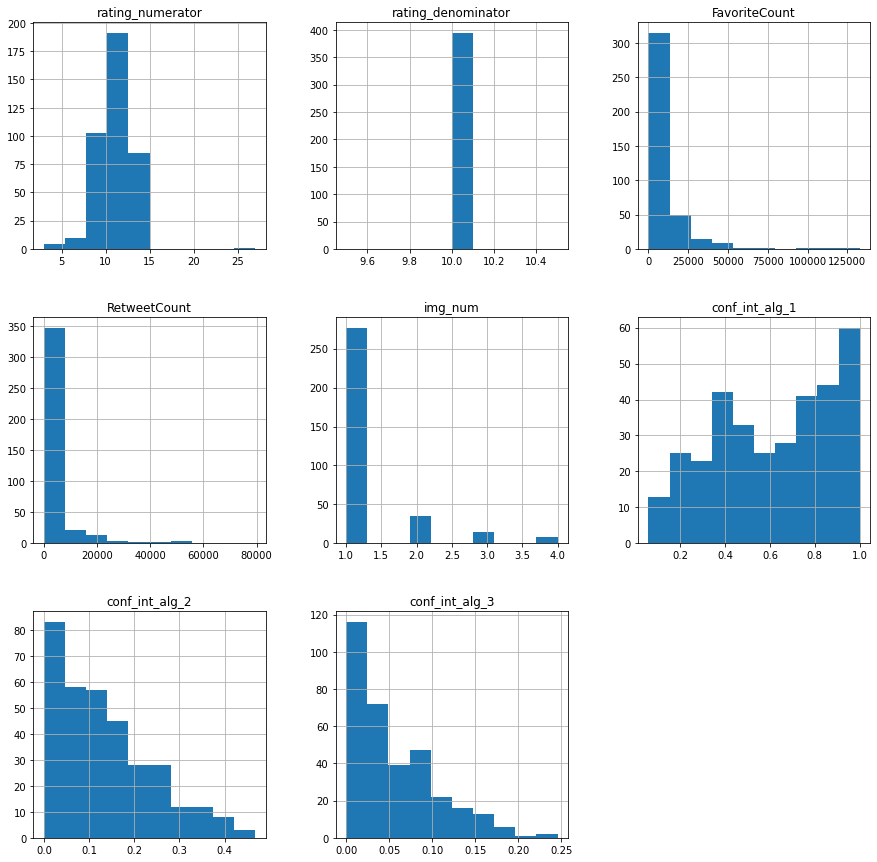

In [89]:
twitter_master_clean.hist(figsize=(15,15))

Obtain a scatter matrix for the dataframe.

array([[<AxesSubplot:xlabel='rating_numerator', ylabel='rating_numerator'>,
        <AxesSubplot:xlabel='rating_denominator', ylabel='rating_numerator'>,
        <AxesSubplot:xlabel='FavoriteCount', ylabel='rating_numerator'>,
        <AxesSubplot:xlabel='RetweetCount', ylabel='rating_numerator'>,
        <AxesSubplot:xlabel='img_num', ylabel='rating_numerator'>,
        <AxesSubplot:xlabel='conf_int_alg_1', ylabel='rating_numerator'>,
        <AxesSubplot:xlabel='conf_int_alg_2', ylabel='rating_numerator'>,
        <AxesSubplot:xlabel='conf_int_alg_3', ylabel='rating_numerator'>],
       [<AxesSubplot:xlabel='rating_numerator', ylabel='rating_denominator'>,
        <AxesSubplot:xlabel='rating_denominator', ylabel='rating_denominator'>,
        <AxesSubplot:xlabel='FavoriteCount', ylabel='rating_denominator'>,
        <AxesSubplot:xlabel='RetweetCount', ylabel='rating_denominator'>,
        <AxesSubplot:xlabel='img_num', ylabel='rating_denominator'>,
        <AxesSubplot:xlabel='conf_i

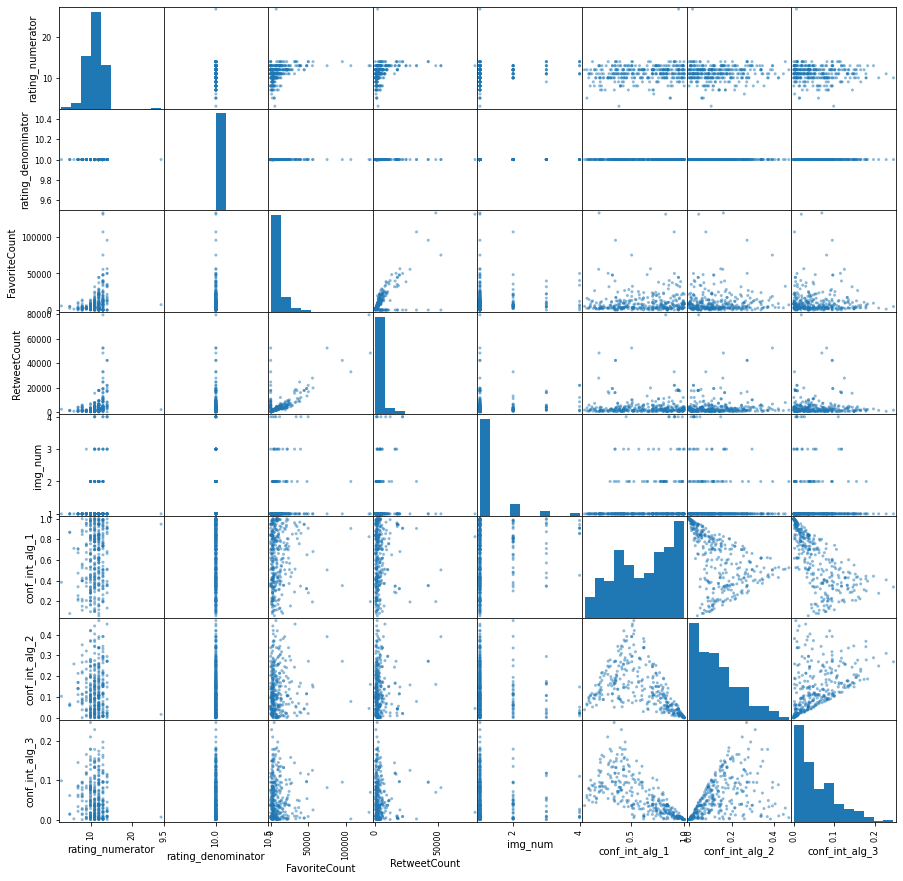

In [78]:
pd.plotting.scatter_matrix(twitter_master_clean,figsize=(15,15))